In [1]:
# NAME-somay
#gmail- somaymangla2000@gmail.com
#contact-9996813535


In [2]:
#importlibaries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
from sklearn.tree import plot_tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.metrics import classification_report,confusion_matrix

In [3]:
#read and print the data
data=pd.read_csv(r'C:\Users\Somay\Documents\IRIS4.csv')
print(data)

      Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  \
0      1            5.1           3.5            1.4           0.2   
1      2            4.9           3.0            1.4           0.2   
2      3            4.7           3.2            1.3           0.2   
3      4            4.6           3.1            1.5           0.2   
4      5            5.0           3.6            1.4           0.2   
..   ...            ...           ...            ...           ...   
145  146            6.7           3.0            5.2           2.3   
146  147            6.3           2.5            5.0           1.9   
147  148            6.5           3.0            5.2           2.0   
148  149            6.2           3.4            5.4           2.3   
149  150            5.9           3.0            5.1           1.8   

            Species  
0       Iris-setosa  
1       Iris-setosa  
2       Iris-setosa  
3       Iris-setosa  
4       Iris-setosa  
..              ...  
145  

In [4]:
#INFORMATION and null value and central measure tendecy
data.info()
data.isnull().sum()
data.describe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 6.5+ KB


<bound method NDFrame.describe of       Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  \
0      1            5.1           3.5            1.4           0.2   
1      2            4.9           3.0            1.4           0.2   
2      3            4.7           3.2            1.3           0.2   
3      4            4.6           3.1            1.5           0.2   
4      5            5.0           3.6            1.4           0.2   
..   ...            ...           ...            ...           ...   
145  146            6.7           3.0            5.2           2.3   
146  147            6.3           2.5            5.0           1.9   
147  148            6.5           3.0            5.2           2.0   
148  149            6.2           3.4            5.4           2.3   
149  150            5.9           3.0            5.1           1.8   

            Species  
0       Iris-setosa  
1       Iris-setosa  
2       Iris-setosa  
3       Iris-setosa  
4       Iris-se

In [5]:
#target species
target=data['Species']
df=data.copy()
df=df.drop('Species',axis=1)
df.shape

(150, 5)

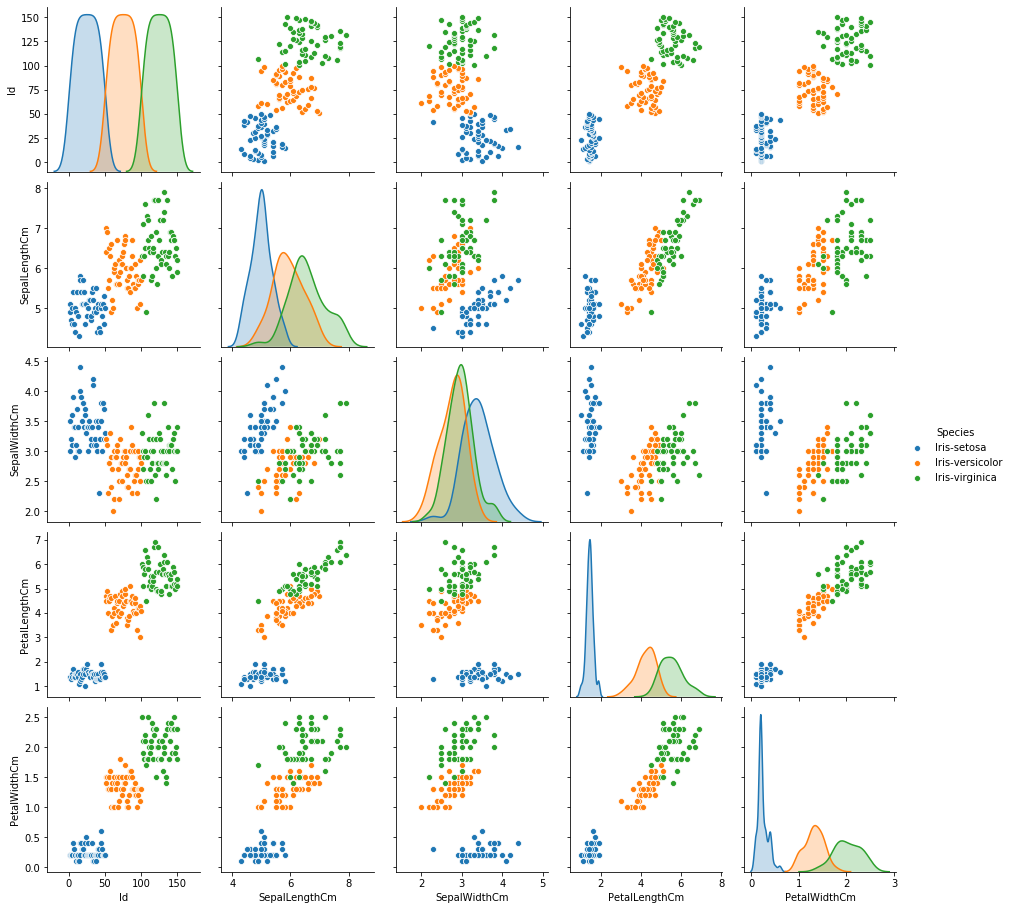

In [6]:
# plot the graph using seaborn libaries
sns.pairplot(data,hue='Species')

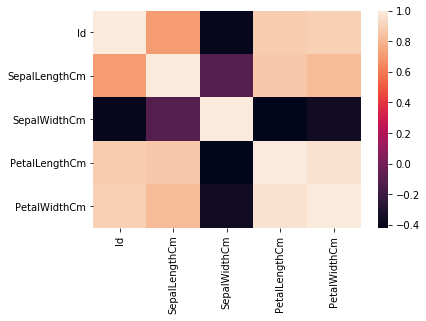

In [7]:
# correlation matrix
sns.heatmap(df.corr())

In [8]:
x=data.iloc[:,[0,1,2,3]].values
laben=LabelEncoder()
data['Species']=laben.fit_transform(data['Species'])
y=data['Species'].values
print("data show",data.shape)

data show (150, 6)


In [9]:
#train and split the data
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1,random_state=40)
print('train split',x_train.shape)
print('test split',x_test.shape)

train split (135, 4)
test split (15, 4)


In [10]:
#define tree algorithms and fit the model
dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)
print('decision tree make')

decision tree make


In [11]:
#predict the value
y_pred=dt.predict(x_test)
print('REPORT',classification_report(y_test,y_pred))

REPORT               precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       1.00      1.00      1.00         7
           2       1.00      1.00      1.00         4

    accuracy                           1.00        15
   macro avg       1.00      1.00      1.00        15
weighted avg       1.00      1.00      1.00        15



Text(0.5, 1.0, 'Accuracy Score:1.0')

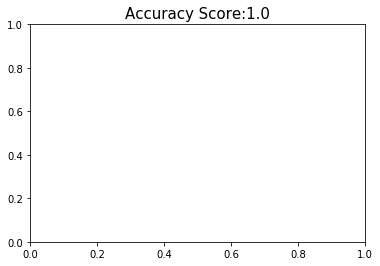

In [12]:
#to check accuracy score
all_sample_title='Accuracy Score:{0}'.format(dt.score(x_test,y_test))
plt.title(all_sample_title,size=15)

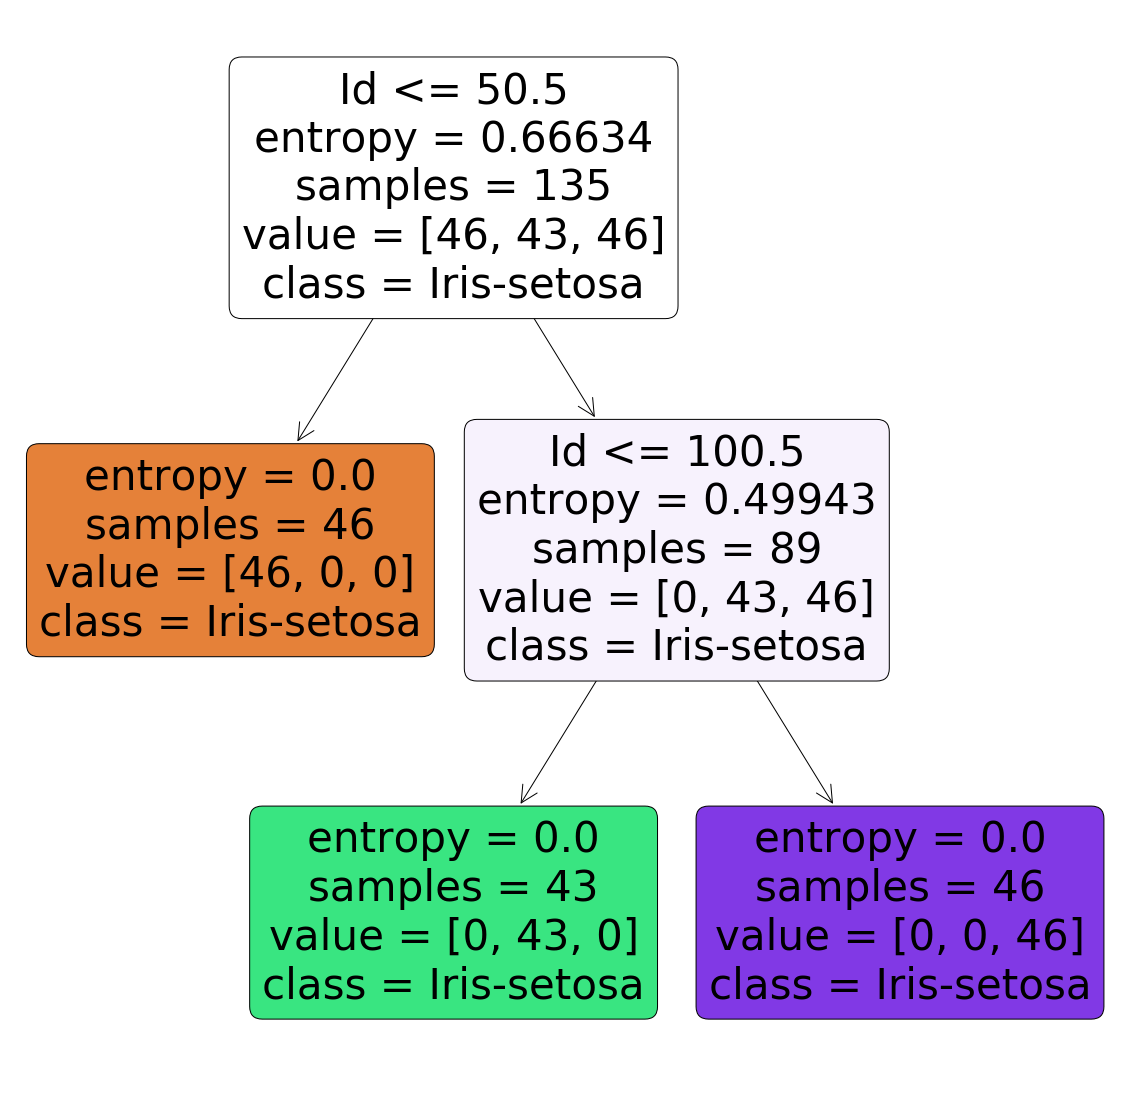

In [13]:
#visualizing the graph
plt.figure(figsize=(20,20))
dec_tree=plot_tree(dt,feature_names=data.columns,class_names=target.values,filled=True,precision=5,rounded=True)